In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

## Load and prepare dataset

In [2]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data = data[data['type'].isin(['CASH_OUT', 'TRANSFER'])]
data = data.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis=1)
data = data.replace({'type':{'CASH_OUT':0, 'TRANSFER':1}})

In [3]:
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']
del data

## Build prediction models

In [4]:
#prepare classifiers 
dt = DecisionTreeClassifier()
ab = AdaBoostClassifier()
knn = KNeighborsClassifier(1)
rf = RandomForestClassifier()

In [ ]:
estimators = [rf, ab]
names = ['Random Forest', 'Ada Boost']
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#evaluate the performance of the prediction models
for i,e in enumerate(estimators):
    scores = cross_val_score(estimator=e, X=X_train, y=y_train, cv=5, scoring='f1')
    print('f1 scores of 5 cross validation:',['%0.3f' %(s) for s in scores])
    print(names[i] + " mean f1: %0.3f with standard deviation: %0.3f" %( scores.mean(),  scores.std()))

f1 scores of 5 cross validation: ['0.872', '0.869', '0.864', '0.865', '0.867']
Random Forest mean f1: 0.867 with standard deviation: 0.003
f1 scores of 5 cross validation: ['0.719', '0.708', '0.748', '0.737', '0.740']
Ada Boost mean f1: 0.730 with standard deviation: 0.015


In [5]:
estimators = [dt, knn]
names = ['Decision Tree', 'kNN']
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#evaluate the performance of the prediction models
for i,e in enumerate(estimators):
    scores = cross_val_score(estimator=e, X=X_train, y=y_train, cv=5, scoring='f1')
    print('f1 scores of 5 cross validation:',['%0.3f' %(s) for s in scores])
    print(names[i] + " mean f1: %0.3f with standard deviation: %0.3f" %( scores.mean(),  scores.std()))

f1 scores of 5 cross validation: ['0.877', '0.869', '0.874', '0.871', '0.877']
Decision Tree mean f1: 0.874 with standard deviation: 0.003
f1 scores of 5 cross validation: ['0.778', '0.747', '0.775', '0.774', '0.770']
kNN mean f1: 0.769 with standard deviation: 0.011


#### Notes: 

From those four algorithms (note: default setting), Decision Tree model achieves the best performance. So, it will be used for predicting test samples that never used in training proces, even in the cross-validation screening.

### Prediction

In [7]:
model = dt.fit(X_train, y_train)
predicts = model.predict(X_test)


### Confusion Matrix

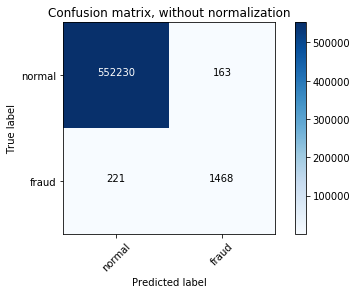

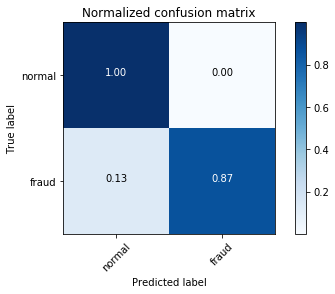

In [22]:
#to print this colourful confusion matrix, I use the function from sklearn documentation: 
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicts)
np.set_printoptions(precision=2)

class_names =["normal","fraud"]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Notes:

1. Using this model, while almost all of the normal transaction can be predicted correctly, about 87% of fraud transactions are predicted correctly. This behaviour is caused by the number of normal transaction outnumber the sample of fraud transaction
2. In order to improve the performance of the model in predicting fraud transaction, an advanced sampling method can be used or do specific treatment for imbalanced class in the algorithm. 